In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# test update

In [17]:
df = pd.read_csv('medical_insurance.csv')
df.head(10)

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
5,76435,63,Female,North,Rural,305000,HS,Single,Employed,3,...,0,0,0,0,0,0,0,1,1,0
6,84005,36,Male,West,Rural,38900,Masters,Single,Employed,1,...,0,0,0,1,0,1,0,1,0,0
7,80918,21,Female,South,Suburban,83700,HS,Single,Employed,3,...,0,0,0,2,1,0,0,1,0,1
8,60768,53,Male,North,Suburban,60700,No HS,Divorced,Retired,1,...,0,0,0,0,0,1,0,1,1,0
9,50075,28,Male,South,Urban,23600,Bachelors,Married,Employed,4,...,0,0,0,0,0,2,0,0,0,0


In [18]:
# stats
df.info(verbose=True)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  int64  
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [19]:
# basic check for demographic columns
demographic_cols = df.columns[1:12]

for col in demographic_cols:
    null_val = df[col].isna().sum()
    zero_count = df[col].eq(0).sum()

    # print(f"Total null values in '{col}': {null_val}")
    print(f"Total zero values in '{col}': {zero_count}")

# drop values in age = 0
df.drop(df[df['age'] == 0].index, inplace=True)

print(df['age'].eq(0).sum())

Total zero values in 'age': 165
Total zero values in 'sex': 0
Total zero values in 'region': 0
Total zero values in 'urban_rural': 0
Total zero values in 'income': 0
Total zero values in 'education': 0
Total zero values in 'marital_status': 0
Total zero values in 'employment_status': 0
Total zero values in 'household_size': 0
Total zero values in 'dependents': 40836
Total zero values in 'bmi': 0
0


In [20]:
print("Unique values for categorical cols")
for col in df.columns:
    if df[col].dtype == object:
        print(f"{col}: {df[col].unique()}")

Unique values for categorical cols
sex: ['Female' 'Male' 'Other']
region: ['North' 'Central' 'West' 'South' 'East']
urban_rural: ['Suburban' 'Urban' 'Rural']
education: ['Doctorate' 'No HS' 'HS' 'Some College' 'Masters' 'Bachelors']
marital_status: ['Married' 'Single' 'Divorced' 'Widowed']
employment_status: ['Retired' 'Employed' 'Self-employed' 'Unemployed']
smoker: ['Never' 'Current' 'Former']
alcohol_freq: [nan 'Weekly' 'Daily' 'Occasional']
plan_type: ['PPO' 'POS' 'HMO' 'EPO']
network_tier: ['Bronze' 'Gold' 'Platinum' 'Silver']


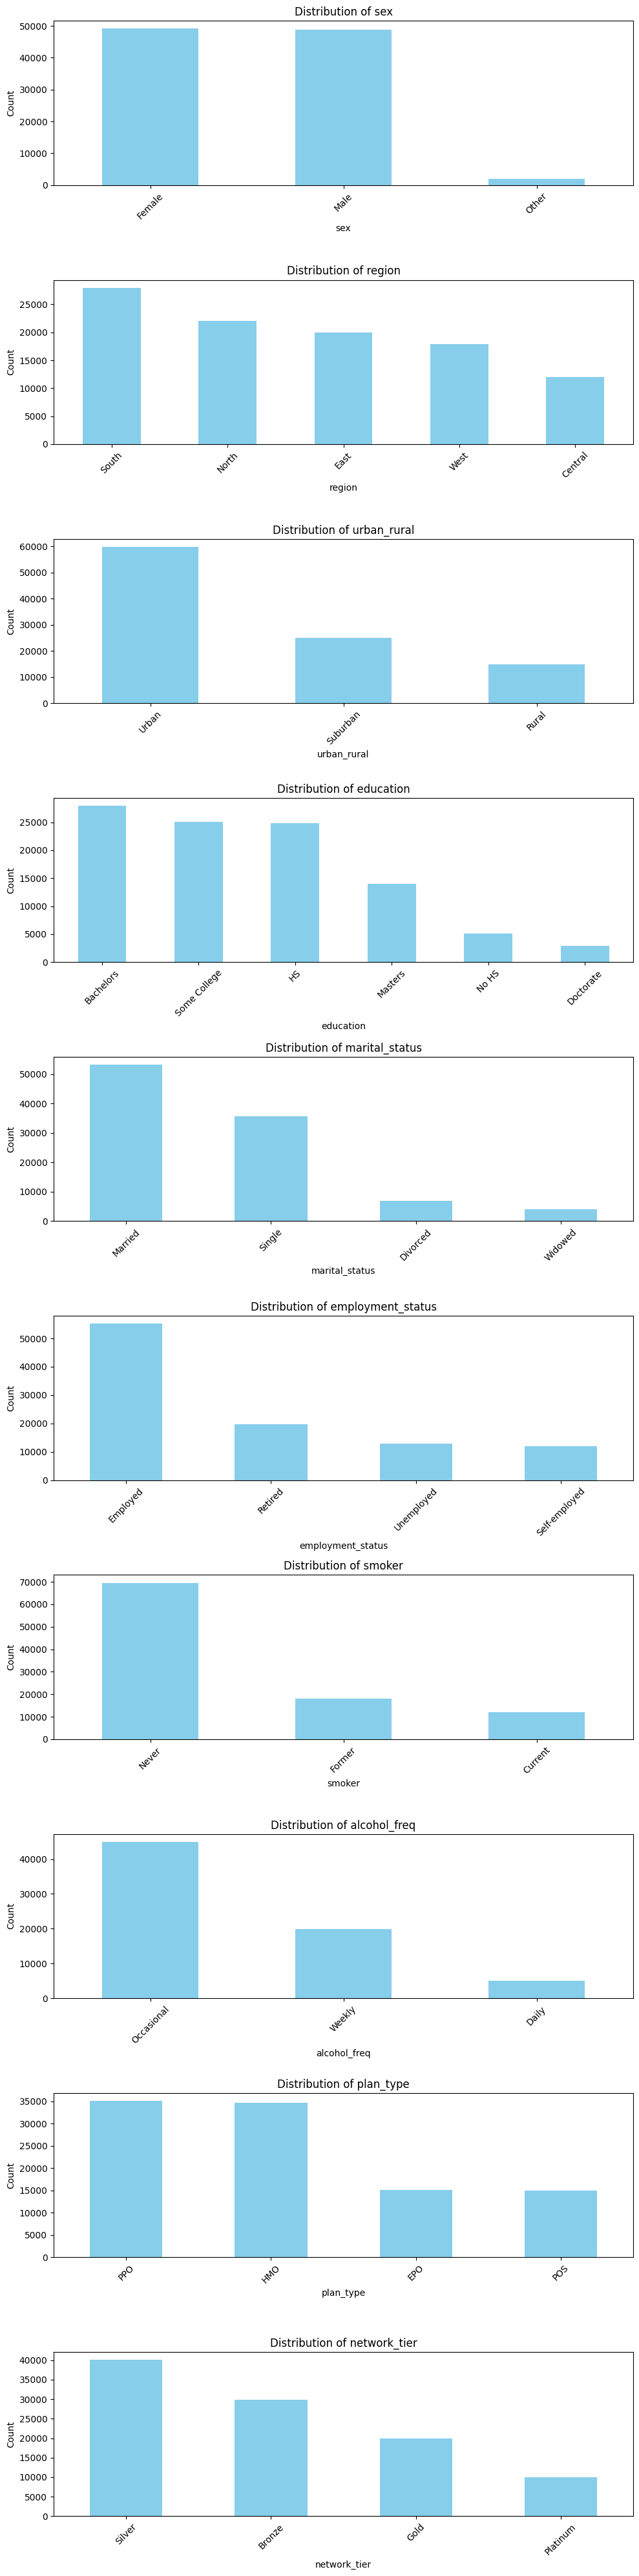

In [21]:
categorical_cols = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 4 * len(categorical_cols)))

# plot distribution for each categorical column
for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [22]:
# drop 'Other' age
df.drop(df[df['age'] == 'Other'].index, inplace=True)
df.count()

person_id                      99835
age                            99835
sex                            99835
region                         99835
urban_rural                    99835
income                         99835
education                      99835
marital_status                 99835
employment_status              99835
household_size                 99835
dependents                     99835
bmi                            99835
smoker                         99835
alcohol_freq                   69798
visits_last_year               99835
hospitalizations_last_3yrs     99835
days_hospitalized_last_3yrs    99835
medication_count               99835
systolic_bp                    99835
diastolic_bp                   99835
ldl                            99835
hba1c                          99835
plan_type                      99835
network_tier                   99835
deductible                     99835
copay                          99835
policy_term_years              99835
p

Feature Engineering

In [23]:
# Features = lifestyle_risk_score, is_high_bp, health_risk_index, healthcare_visit_frequency, medication_load
def engineer_health_features(df):
    df = df.copy()

    # age_group
    df["age_group"] = pd.cut(
        df["age"],
        bins=[0, 25, 40, 55, 65, 120],
        labels=["young", "adult", "mid_age", "senior", "elderly"]
    )
    
    # lifestyle_risk_score
    df["lifestyle_risk_score"] = (
        (df["smoker"] == "yes").astype(int) +
        (df["alcohol_freq"].isin(["daily", "weekly"])).astype(int) +
        (df["bmi"] > 30).astype(int)
    )
    
    # is_high_bp
    df["is_high_bp"] = (
        (df["systolic_bp"] >= 140) | 
        (df["diastolic_bp"] >= 90)
    ).astype(int)

    # health_risk_index
    df["health_risk_index"] = (
        (df["bmi"] > 30).astype(int) +
        df["is_high_bp"] +
        (df["ldl"] > 160).astype(int) +
        (df["hba1c"] >= 6.5).astype(int)
    )
    
    # healthcare_visit_frequency
    utilization_cols = [
        "visits_last_year",
        "hospitalizations_last_3yrs",
        "proc_consult_count",
        "proc_lab_count",
        "proc_imaging_count",
        "proc_surgery_count",
        "proc_physio_count"
    ]
    df["healthcare_visit_frequency"] = df[utilization_cols].sum(axis=1)

    # medication_load
    df['medication_load'] = np.log1p(df["medication_count"])


    return df


In [24]:
df = engineer_health_features(df)

df[['age_group', 'lifestyle_risk_score', 'is_high_bp', 'health_risk_index', 'healthcare_visit_frequency', 'medication_load']].head(10)

,age_group,lifestyle_risk_score,is_high_bp,health_risk_index,healthcare_visit_frequency,medication_load
0,mid_age,0,0,0,6,1.609438
1,elderly,0,0,0,4,1.386294
2,elderly,1,1,2,5,1.609438
3,young,1,0,3,2,0.693147
4,mid_age,1,0,2,7,1.098612
5,senior,0,1,1,2,1.098612
6,adult,0,0,0,3,0.000000
7,young,1,0,3,7,0.693147
8,mid_age,0,0,0,2,0.000000
9,adult,1,0,1,2,0.000000


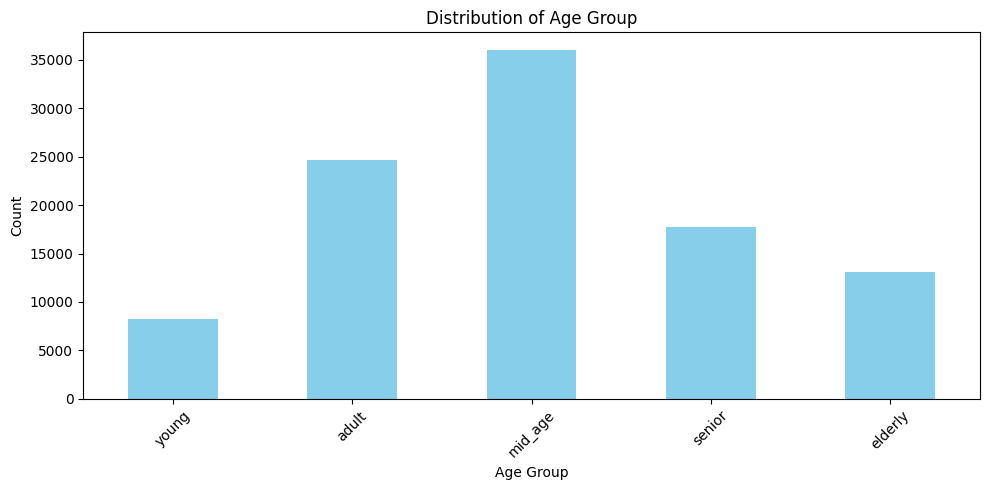

In [25]:
df['age_group'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# encode categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"All categorical columns: {categorical_cols}")

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

All categorical columns: Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier', 'age_group'],
      dtype='object')


Feature Selection

In [27]:
# remove columns to prevent leakage
leakage_columns = [
    'monthly_premium',
    'annual_medical_cost',
    'claims_count',
    'avg_claim_amount',
    'total_claims_paid',
    'risk_score',
    'provider_quality',
    'had_major_procedure',
    'policy_changes_last_2yrs'
]

print(f"\nColumns to remove: {leakage_columns}")

columns_to_drop = [col for col in leakage_columns if col in df.columns]
print(f"Columns found in dataframe: {columns_to_drop}")

# Drop the columns
if columns_to_drop:
    df.drop(columns=columns_to_drop, inplace=True)
    print(f"Dropped {len(columns_to_drop)} columns")
else:
    print("No leakage columns found in dataframe")

print(f"\nRemaining columns: {df.columns.tolist()}")


Columns to remove: ['monthly_premium', 'annual_medical_cost', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'risk_score', 'provider_quality', 'had_major_procedure', 'policy_changes_last_2yrs']
Columns found in dataframe: ['monthly_premium', 'annual_medical_cost', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'risk_score', 'provider_quality', 'had_major_procedure', 'policy_changes_last_2yrs']
Dropped 9 columns

Remaining columns: ['person_id', 'age', 'sex', 'region', 'urban_rural', 'income', 'education', 'marital_status', 'employment_status', 'household_size', 'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years', 'annual_premium', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 

In [28]:
# correlation
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# filter
filter_selector = SelectKBest(score_func=mutual_info_regression, k='all')

X = df.drop('annual_premium', axis=1)
y = df['annual_premium']
filter_selector.fit(X, y)
filter_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': filter_selector.scores_
}).sort_values('Score', ascending=False)
print(filter_scores)

# embedded
embedded_selector = SelectFromModel(
    estimator=LassoCV(cv=5),
    threshold="median"
)

embedded_selector.fit(X, y)
selected_features_embedded = X.columns[embedded_selector.get_support()].tolist()
print(f"Selected features: {selected_features_embedded}")
print(f"Number of features selected: {len(selected_features_embedded)}")

# wrapper
wrapper_selector = RFE(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_features_to_select=10
)

wrapper_selector.fit(X, y)
selected_features_wrapper = X.columns[wrapper_selector.support_].tolist()
print(f"Selected features: {selected_features_wrapper}")
print(f"Number of features selected: {len(selected_features_wrapper)}")

                             person_id       age       sex    region  \
person_id                     1.000000 -0.000640  0.000350 -0.000202   
age                          -0.000640  1.000000  0.000378  0.002316   
sex                           0.000350  0.000378  1.000000  0.000045   
region                       -0.000202  0.002316  0.000045  1.000000   
urban_rural                   0.001411 -0.001053 -0.003676 -0.003158   
income                        0.002178  0.005642 -0.000663  0.002071   
education                    -0.002429 -0.005304 -0.007105 -0.005289   
marital_status                0.000790 -0.003322 -0.001659 -0.000403   
employment_status             0.002912  0.002205 -0.003738 -0.000526   
household_size               -0.004317  0.000872 -0.002124  0.000414   
dependents                   -0.004832 -0.000840 -0.000145  0.001661   
bmi                          -0.000428  0.002497  0.000719 -0.001636   
smoker                       -0.002220  0.008313  0.006790  0.00

In [31]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature scaling (important for Ridge/Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set size: 79868
Test set size: 19967


## Modelling

In [32]:
print("\n" + "="*60)
print("PART C: TRAINING REGRESSION MODELS")
print("="*60)

# Dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=10, random_state=42)
}

# Dictionary to store results
results = {}

# Train each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")

    # Use scaled data for Linear and Ridge, original for Decision Tree
    if name == 'Decision Tree Regressor':
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

    # Store predictions
    results[name] = {
        'model': model,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test
    }

    print(f"✓ {name} trained successfully")


PART C: TRAINING REGRESSION MODELS

--- Training Linear Regression ---
✓ Linear Regression trained successfully

--- Training Ridge Regression ---
✓ Ridge Regression trained successfully

--- Training Decision Tree Regressor ---
✓ Decision Tree Regressor trained successfully


# Performance Measurement

In [33]:
# Function to calculate all metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Calculate metrics for all models
performance_summary = []

for name in models.keys():
    print(f"\n{'='*60}")
    print(f"{name}")
    print(f"{'='*60}")

    # Training metrics
    train_metrics = calculate_metrics(y_train, results[name]['y_pred_train'])
    print("\nTraining Set Performance:")
    for metric, value in train_metrics.items():
        print(f"  {metric}: {value:,.4f}")

    # Test metrics
    test_metrics = calculate_metrics(y_test, results[name]['y_pred_test'])
    print("\nTest Set Performance:")
    for metric, value in test_metrics.items():
        print(f"  {metric}: {value:,.4f}")

    # Calculate overfitting indicator
    overfit_score = train_metrics['R2'] - test_metrics['R2']
    print(f"\nOverfitting Indicator (Train R2 - Test R2): {overfit_score:.4f}")

    # Store for comparison
    performance_summary.append({
        'Model': name,
        'Train_MAE': train_metrics['MAE'],
        'Test_MAE': test_metrics['MAE'],
        'Train_MSE': train_metrics['MSE'],
        'Test_MSE': test_metrics['MSE'],
        'Train_RMSE': train_metrics['RMSE'],
        'Test_RMSE': test_metrics['RMSE'],
        'Train_R2': train_metrics['R2'],
        'Test_R2': test_metrics['R2'],
        'Overfitting': overfit_score
    })

# Create performance comparison DataFrame
perf_df = pd.DataFrame(performance_summary)
print("\n" + "="*60)
print("PERFORMANCE COMPARISON SUMMARY")
print("="*60)
print(perf_df.to_string(index=False))


Linear Regression

Training Set Performance:
  MAE: 222.4912
  MSE: 131,439.5047
  RMSE: 362.5459
  R2: 0.1691

Test Set Performance:
  MAE: 224.4609
  MSE: 140,275.3970
  RMSE: 374.5336
  R2: 0.1561

Overfitting Indicator (Train R2 - Test R2): 0.0129

Ridge Regression

Training Set Performance:
  MAE: 222.4912
  MSE: 131,439.5047
  RMSE: 362.5459
  R2: 0.1691

Test Set Performance:
  MAE: 224.4608
  MSE: 140,275.3874
  RMSE: 374.5336
  R2: 0.1561

Overfitting Indicator (Train R2 - Test R2): 0.0129

Decision Tree Regressor

Training Set Performance:
  MAE: 208.1857
  MSE: 108,674.7341
  RMSE: 329.6585
  R2: 0.3130

Test Set Performance:
  MAE: 226.8741
  MSE: 152,726.3577
  RMSE: 390.8022
  R2: 0.0812

Overfitting Indicator (Train R2 - Test R2): 0.2317

PERFORMANCE COMPARISON SUMMARY
                  Model  Train_MAE   Test_MAE     Train_MSE      Test_MSE  Train_RMSE  Test_RMSE  Train_R2  Test_R2  Overfitting
      Linear Regression 222.491249 224.460883 131439.504668 140275.396979  

# MAE, RMSE, R-Squared, MSE

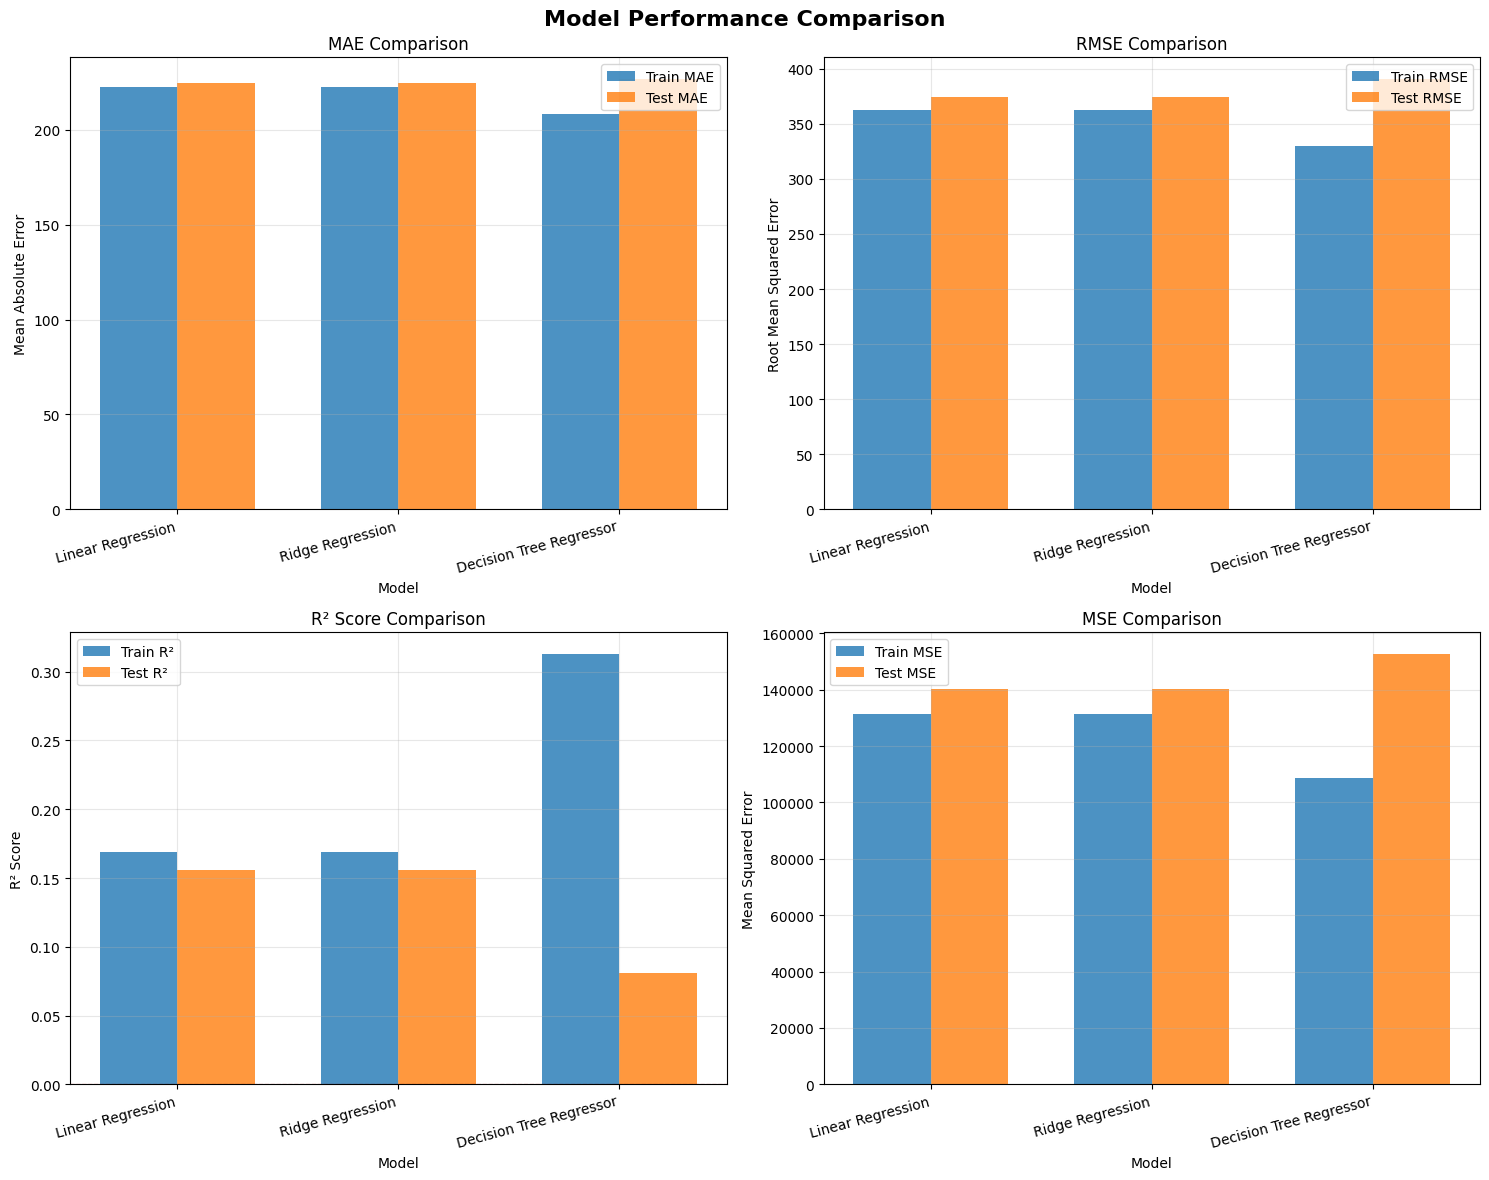

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

x_pos = np.arange(len(perf_df))
width = 0.35

# Plot 1: MAE Comparison (Lower is Better)
ax1 = axes[0, 0]
ax1.bar(x_pos - width/2, perf_df['Train_MAE'], width, label='Train MAE', alpha=0.8)
ax1.bar(x_pos + width/2, perf_df['Test_MAE'], width, label='Test MAE', alpha=0.8)
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Absolute Error')
ax1.set_title('MAE Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(perf_df['Model'], rotation=15, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: RMSE Comparison (Lower is Better)
ax2 = axes[0, 1]
ax2.bar(x_pos - width/2, perf_df['Train_RMSE'], width, label='Train RMSE', alpha=0.8)
ax2.bar(x_pos + width/2, perf_df['Test_RMSE'], width, label='Test RMSE', alpha=0.8)
ax2.set_xlabel('Model')
ax2.set_ylabel('Root Mean Squared Error')
ax2.set_title('RMSE Comparison')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(perf_df['Model'], rotation=15, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: R² Score Comparison (Higher is Better)
ax3 = axes[1, 0]
ax3.bar(x_pos - width/2, perf_df['Train_R2'], width, label='Train R²', alpha=0.8)
ax3.bar(x_pos + width/2, perf_df['Test_R2'], width, label='Test R²', alpha=0.8)
ax3.set_xlabel('Model')
ax3.set_ylabel('R² Score')
ax3.set_title('R² Score Comparison')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(perf_df['Model'], rotation=15, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='r', linestyle='--', linewidth=0.8)

# Plot 4: MSE Comparison (Lower is Better)
ax4 = axes[1, 1]
ax4.bar(x_pos - width/2, perf_df['Train_MSE'], width, label='Train MSE', alpha=0.8)
ax4.bar(x_pos + width/2, perf_df['Test_MSE'], width, label='Test MSE', alpha=0.8)
ax4.set_xlabel('Model')
ax4.set_ylabel('Mean Squared Error')
ax4.set_title('MSE Comparison')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(perf_df['Model'], rotation=15, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Overfitting Analysis

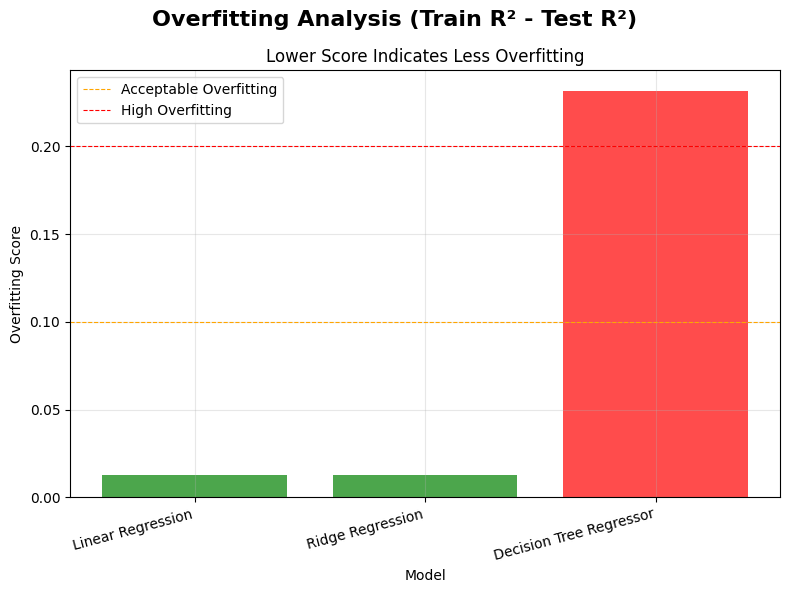

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Overfitting Analysis (Train R² - Test R²)', fontsize=16, fontweight='bold')

x_pos = np.arange(len(perf_df))
colors = ['green' if x < 0.1 else 'orange' if x < 0.2 else 'red' for x in perf_df['Overfitting']]
ax.bar(x_pos, perf_df['Overfitting'], color=colors, alpha=0.7)
ax.set_xlabel('Model')
ax.set_ylabel('Overfitting Score')
ax.set_title('Lower Score Indicates Less Overfitting')
ax.set_xticks(x_pos)
ax.set_xticklabels(perf_df['Model'], rotation=15, ha='right')
ax.axhline(y=0.1, color='orange', linestyle='--', linewidth=0.8, label='Acceptable Overfitting')
ax.axhline(y=0.2, color='red', linestyle='--', linewidth=0.8, label='High Overfitting')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_overfitting_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Predicted vs Actual Values

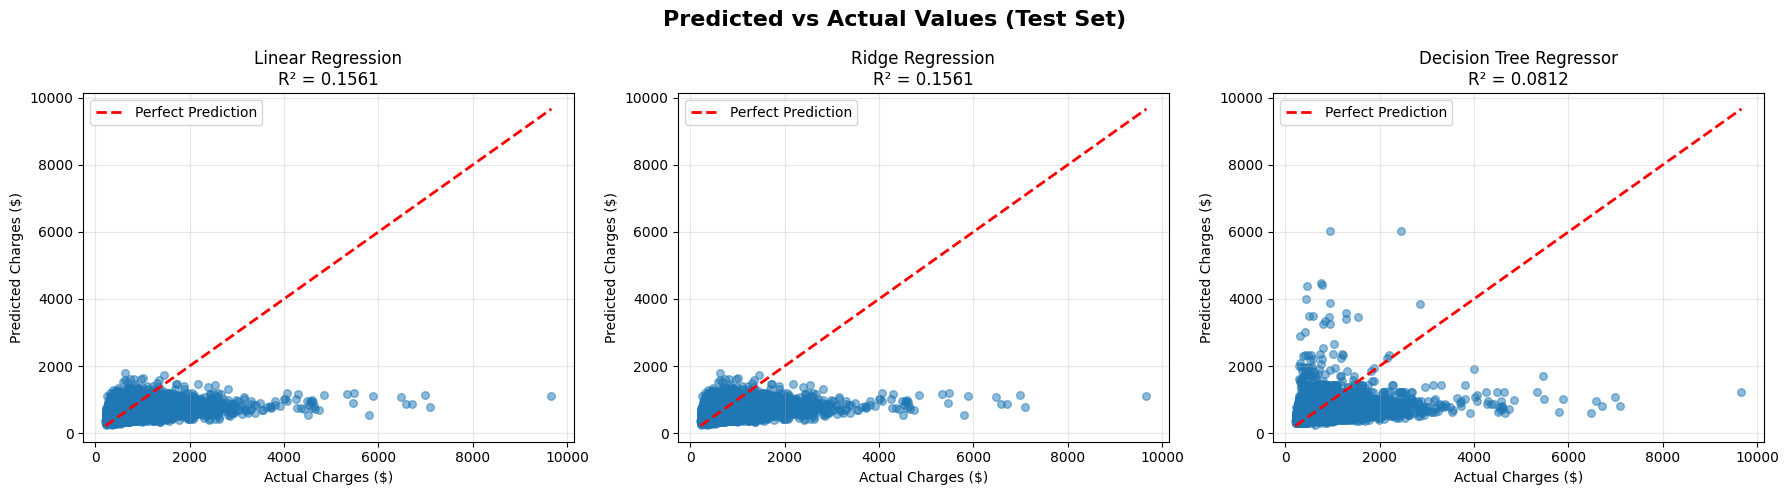

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Predicted vs Actual Values (Test Set)', fontsize=16, fontweight='bold')

for idx, (name, ax) in enumerate(zip(models.keys(), axes.flat)):
    y_pred = results[name]['y_pred_test']

    ax.scatter(y_test, y_pred, alpha=0.5, s=30)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('Actual Charges ($)')
    ax.set_ylabel('Predicted Charges ($)')
    ax.set_title(f'{name}\nR² = {perf_df.iloc[idx]["Test_R2"]:.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predicted_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

# Residual Analysis

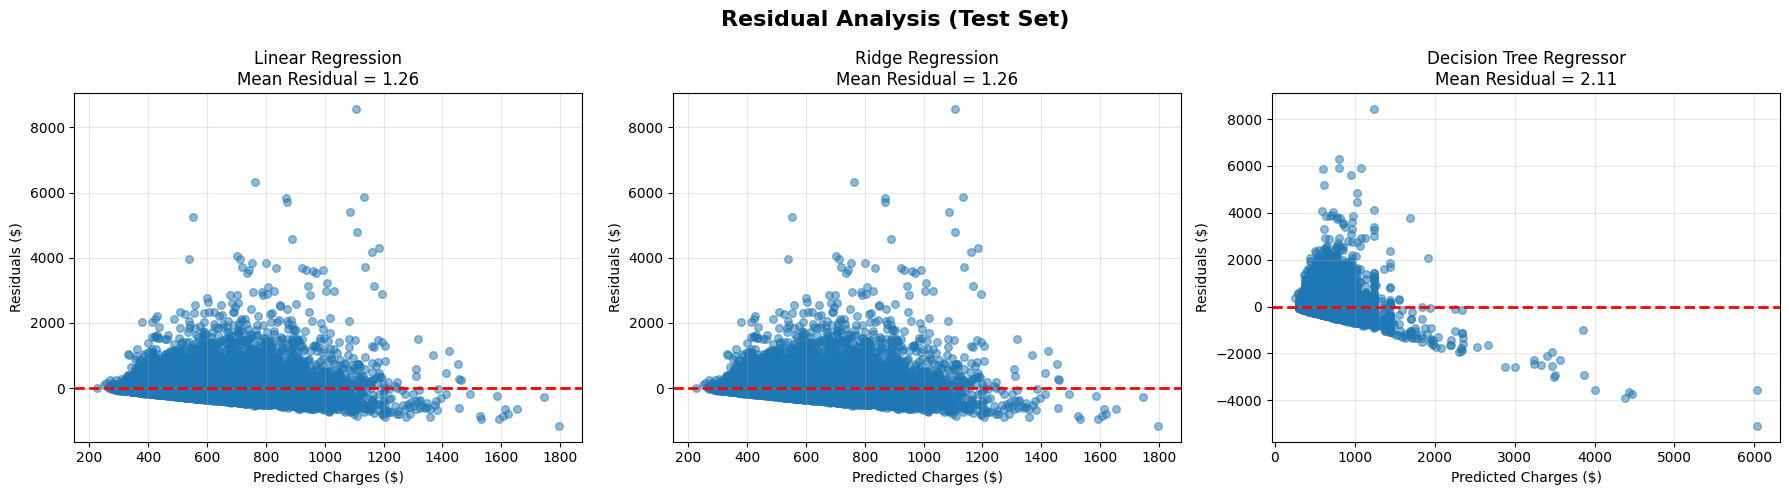

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Residual Analysis (Test Set)', fontsize=16, fontweight='bold')

for idx, (name, ax) in enumerate(zip(models.keys(), axes.flat)):
    y_pred = results[name]['y_pred_test']
    residuals = y_test - y_pred

    ax.scatter(y_pred, residuals, alpha=0.5, s=30)
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Charges ($)')
    ax.set_ylabel('Residuals ($)')
    ax.set_title(f'{name}\nMean Residual = {residuals.mean():.2f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Bias Variance Analysis


BIAS-VARIANCE ANALYSIS - LEARNING CURVES

Generating learning curve for Linear Regression...

Generating learning curve for Ridge Regression...

Generating learning curve for Decision Tree Regressor...


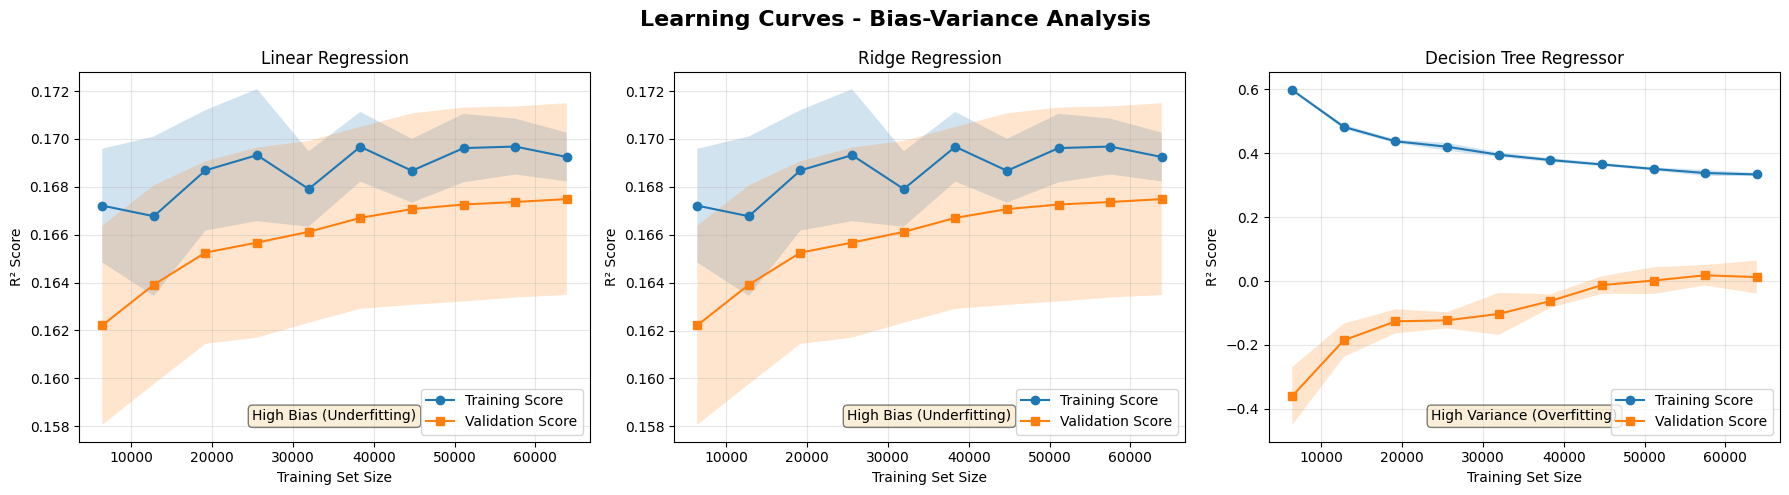

In [38]:
print("\n" + "="*60)
print("BIAS-VARIANCE ANALYSIS - LEARNING CURVES")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Learning Curves - Bias-Variance Analysis', fontsize=16, fontweight='bold')

train_sizes = np.linspace(0.1, 1.0, 10)

for idx, (name, ax) in enumerate(zip(models.keys(), axes.flat)):
    print(f"\nGenerating learning curve for {name}...")

    model = models[name]

    if name == 'Decision Tree Regressor':
        X_data = X_train
    else:
        X_data = X_train_scaled

    train_sizes_abs, train_scores, val_scores = learning_curve(
        model, X_data, y_train,
        train_sizes=train_sizes,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=42
    )

    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)

    ax.plot(train_sizes_abs, train_mean, label='Training Score', marker='o')
    ax.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.2)

    ax.plot(train_sizes_abs, val_mean, label='Validation Score', marker='s')
    ax.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.2)

    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('R² Score')
    ax.set_title(f'{name}')
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)

    # Interpret bias-variance
    final_gap = train_mean[-1] - val_mean[-1]
    if final_gap > 0.15:
        interpretation = "High Variance (Overfitting)"
    elif val_mean[-1] < 0.6:
        interpretation = "High Bias (Underfitting)"
    else:
        interpretation = "Good Balance"

    ax.text(0.5, 0.05, interpretation, transform=ax.transAxes,
            ha='center', va='bottom', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('learning_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# SUMMARY

In [39]:
print("\n" + "="*60)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("="*60)

best_model_idx = perf_df['Test_R2'].idxmax()
best_model_name = perf_df.loc[best_model_idx, 'Model']
best_r2 = perf_df.loc[best_model_idx, 'Test_R2']
best_rmse = perf_df.loc[best_model_idx, 'Test_RMSE']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   - Test R-squared Score: {best_r2:.4f}")
print(f"   - Test RMSE: ${best_rmse:,.2f}")
print(f"   - Overfitting Score: {perf_df.loc[best_model_idx, 'Overfitting']:.4f}")

print("\n📊 MODEL RANKINGS (by Test R-squared):")
ranked = perf_df.sort_values('Test_R2', ascending=False)
for i, row in enumerate(ranked.itertuples(), 1):
    print(f"   {i}. {row.Model}: R-squared = {row.Test_R2:.4f}, RMSE = ${row.Test_RMSE:,.2f}")



FINAL SUMMARY AND RECOMMENDATIONS

🏆 BEST PERFORMING MODEL: Ridge Regression
   - Test R-squared Score: 0.1561
   - Test RMSE: $374.53
   - Overfitting Score: 0.0129

📊 MODEL RANKINGS (by Test R-squared):
   1. Ridge Regression: R-squared = 0.1561, RMSE = $374.53
   2. Linear Regression: R-squared = 0.1561, RMSE = $374.53
   3. Decision Tree Regressor: R-squared = 0.0812, RMSE = $390.80
